### Data Analysis
#### Table of Content
1. [Impact of mapping on Latency](#1-impact-of-mapping-on-latency)

In [185]:
"""
Importing Generated Data  
"""

import os 
import pickle 

directory_path = 'data/task_5'
entries = os.listdir(directory_path)
files = sorted([entry for entry in entries if os.path.isfile(os.path.join(directory_path, entry))])

list_of_dict = []
for file_name in files: 
    file_path = os.path.join(directory_path,file_name)
    with open(file_path, 'rb') as file: 
        dict = pickle.load(file)
        list_of_dict.append(dict)
        
print(f"Number of files in \"{directory_path}\": \t{len(files)}")
print(f"Number of files in imported list: \t{len(list_of_dict)}")

Number of files in "data/task_5": 	3600
Number of files in imported list: 	3600


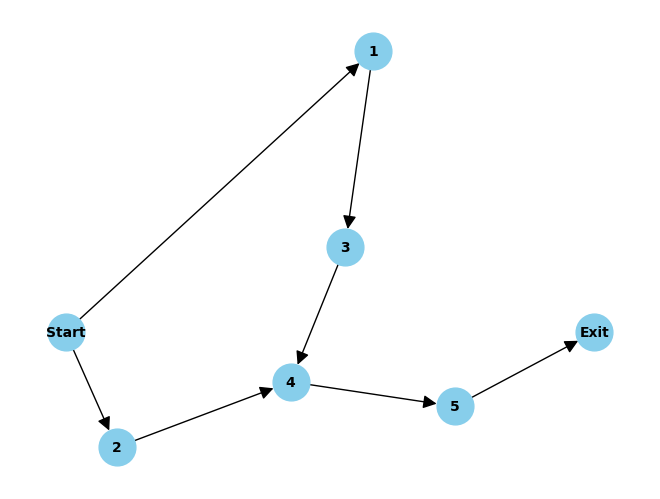

In [186]:
"""
Function for Visualizing Graph Object
"""

import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np

def visGraph(graph, pos=None):
    if pos is None:
        pos = nx.spring_layout(task_graph, seed=42)
        pos['Start'] = np.array([-1,0])
        pos['Exit'] = np.array([1,0])
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    plt.show()

task_graph = list_of_dict[0]['task_graph']
visGraph(task_graph)

In [187]:
"""
Converting Imported data to Pandas.DataFrame
"""
import pandas as pd 
data_df = pd.DataFrame(list_of_dict)

In [193]:
"""
Get Latency Distribution from the number of mapping each task has
"""

def calculateStats(dataframe, column_names):
    stats_dict = {}
    for column_name in column_names:
        column_range = dataframe[column_name].max() - dataframe[column_name].min()
        column_std_dev = dataframe[column_name].std()
        column_mean = dataframe[column_name].mean()
        column_median = dataframe[column_name].median()
        
        stats_dict[column_name] = {
            'range': column_range,
            'std': column_std_dev, 
            'mean': column_mean, 
            'median': column_median

        }
    return stats_dict

def getStatFromFilteredDF(demand_df, plot=False):

    demand_df.reset_index(inplace=True, drop=True)
    demand_df.index += 1

    stats = calculateStats(demand_df, ['avg_packet_lat', 'avg_flit_lat'])

    if plot:
        fig, ax1 = plt.subplots()

        ax1.plot(demand_df.index.to_numpy(), demand_df['avg_packet_lat'].to_numpy(), label='Avg Packet Latency', color='blue')
        ax1.set_xlabel('Entry')
        ax1.set_ylabel('Average Packet Latency', color='blue')
        ax1.tick_params('y', colors='blue')

        ax2 = ax1.twinx()

        ax2.plot(demand_df.index.to_numpy(), demand_df['avg_flit_lat'].to_numpy(), label='Avg Flit Latency', color='green')
        ax2.set_ylabel('Average Flit Latency', color='green')
        ax2.tick_params('y', colors='green')

        fig.tight_layout()
        plt.show()

    return stats

def getMapVariation(max_out, alpha, beta, demand_level, plot=False):
    filtered_df = data_df.query(f"max_out == {max_out} and alpha == {alpha} and beta == {beta} and demand_level == {demand_level}")
    unique_demand = filtered_df['demand'].apply(tuple).unique() # Returns Unique values of Demand

    unique_lists = [list(t) for t in unique_demand] # List of Unique demand values
    
    stat_list = []
    for unique_list in unique_lists:
        demand_df = filtered_df[filtered_df['demand'].apply(lambda x: set(unique_list).issubset(set(x)))] # Filtering dataframe by looking for similar demand
        stat = getStatFromFilteredDF(demand_df)
        stat_list.append(stat)

    return stat_list

max_out_list = sorted(data_df['max_out'].unique())
alpha_list = sorted(data_df['alpha'].unique())
beta_list = sorted(data_df['beta'].unique())
demand_level_list = sorted(data_df['demand_level'].unique())

print(f"Max Out: \t{max_out_list}")
print(f"Alpha: \t\t{alpha_list}")
print(f"Beta: \t\t{beta_list}")
print(f"Demand Level: \t{demand_level_list}")

mapping_data = []
for max_out in max_out_list:
    for alpha in alpha_list:
        for beta in beta_list:
            for demand_level in demand_level_list:
                stat = {}
                stat_list = getMapVariation(max_out, alpha, beta, demand_level)
                stat['max_out'] = max_out
                stat['alpha'] = alpha
                stat['demand_level'] = demand_level

                for mapping_stat in stat_list:
                    for feature_name in mapping_stat:
                        for stat_name in mapping_stat[feature_name]:
                            name = feature_name + '_' + stat_name
                            stat[name] = mapping_stat[feature_name][stat_name]

                    mapping_data.append(stat)

print(f"\nLength of mapping Data {len(mapping_data)}")

Max Out: 	[1, 2, 3, 4, 5]
Alpha: 		[0.5, 1.0, 1.5]
Beta: 		[0.0, 0.5, 1.0, 2.0]
Demand Level: 	[0, 1, 2]

Length of mapping list 360


##### 1. Impact of mapping on Latency 

In [194]:
"""
Plot Mapping Data
"""

'\nPlot Mapping Data\n'